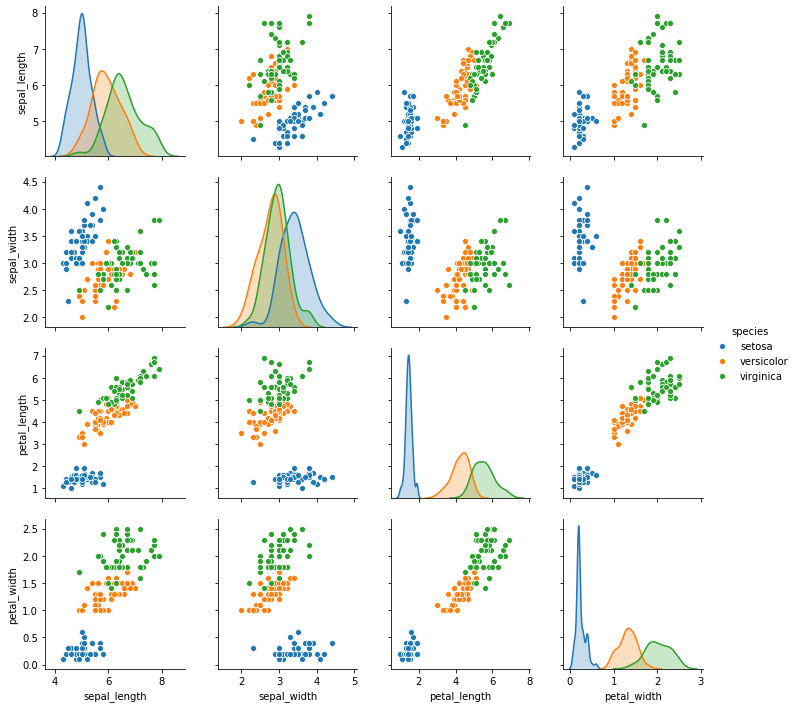

In [2]:
'''Q1To begin understanding the dataset, plot the pairs plot (scatter plot matrix) of
the data. Note that the pairs plot includes the scatter plots of every dimension
versus another dimension.'''


from sklearn.datasets import load_iris
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt
import seaborn as sns

iris = sns.load_dataset("iris")         # loading the required database
g = sns.pairplot(iris, hue='species')   # creating the pairplot which will includes the scatter plots of every dimension versus another dimension.


In [3]:
#Q2 part 1 and 2
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
X = iris.iloc[:, :-1].values                                                    # all x values are the features 
y = iris.iloc[:, 4].values                                                      # all y values are the class label 

#dividing the data into train, validation, and test sets (60%, 20%, 20%) 
#random state=42 in the train test split function to get the same split every time .

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

#Train the model with each classiffer's default parameters
knn = KNeighborsClassifier()

#Use the train set and test the model on the test set.
knn.fit(X_train,y_train)                                                         #‘fit’ method is used to train the model on training data (X_train,y_train)

scores_list=[]
y_pred=knn.predict(X_test)                                                       #predict’ method to do the testing on testing data (X_test)

#Store the accuracy of the model.
scores_list.append(metrics.accuracy_score(y_test,y_pred))
scores_list

[0.9666666666666667]

Knn Q2 
The accuracy of this model is 96.667%

Text(0, 0.5, 'Testing Accuracy')

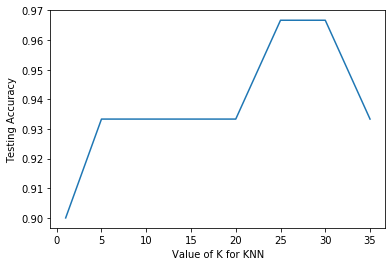

In [4]:
#Q2 part 3
k_range =[1,5,10,15,20,25,30,35]

k=1
scores = {}
scores_list = []
for k in k_range :
        knn = KNeighborsClassifier(n_neighbors=k)                   #Tn_neighbors‘ are the number of neighbors that will vote for the class of the target point;
        knn.fit(X_train,y_train)                                    #Train the model using the train set
        y_pred=knn.predict(X_val)                                   # Test the model using the validation set
        scores[k] = metrics.accuracy_score(y_val,y_pred)          
        scores_list.append(metrics.accuracy_score(y_val,y_pred))    #accuracy stored 
   #     i=i+1

#plot a figure that shows the relationship between the accuracy and the parameter.

plt.plot(k_range,scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

An ideal way to choose an optimal k is the one with the highest maximum accuracy.From the graph we can conclude the best value of k lies between 25 to 30, both have accuracy as 100%

We take k=25 as it has better precision and computation and better F1 scores. Also, it has minimal convergence time. It is advisible to take odd values for binary classification to avoid the ties i.e. two classes labels achieving the same score.

In [5]:
#Q2 part 4
knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
cm = metrics.accuracy_score(y_test,y_pred)
cm


1.0

The model has accuracy of 100%



[95.75757575757576, 96.66666666666666, 96.66666666666666, 96.66666666666669, 96.66666666666669, 96.66666666666669, 94.23076923076923, 93.3974358974359]


Text(0, 0.5, 'Mean accuracy')

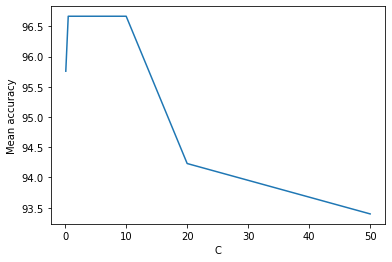

In [6]:
#Q3

from sklearn import svm
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
iris = sns.load_dataset("iris")  
X = iris.iloc[:, :-1].values                                                    # all x values are the features 
y = iris.iloc[:, 4].values                                                      # all y values are the class label 

list=[]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)     #splitting the data into test data(80%) train data (20%)
C=  [0.1, 0.5, 1, 2, 5, 10, 20, 50]
for c in C:
    clf = svm.SVC(kernel='linear',C=c, random_state=42)
    clf.fit(X_train,y_train)
    scores = cross_val_score(clf, X_train, y_train, cv=10,scoring='accuracy')   #using 10 fold cross validation which will use 90 percent of data for training and 10 percent of data for validating

    list.append(scores.mean()*100)                                              #stores the mean accuracy score

print(list)

#plotting the graph
plt.plot(C,list)
plt.xlabel('C')
plt.ylabel('Mean accuracy')



The best accuracy for train validation set is at C=2 as it has minimal convergence time. Also,When C is small, classification mistakes are given less importance and focus is more on maximizing the margin.
C=2 also has better prescision and F1 score (using classification matrix)

In [7]:
from sklearn import metrics

clf = svm.SVC(kernel='linear',C=2,random_state=42)
clf.fit(X_train,y_train)
scores = cross_val_score(clf, X_train, y_train, cv=10)
print(metrics.accuracy_score(y_test,clf.predict(X_test)).mean()*100)
#print('the best accuracy is for C=2 at 100%')

100.0


The accuracy for train test at C=2 is 100%



Text(0.5, 0, 'depth of tress')

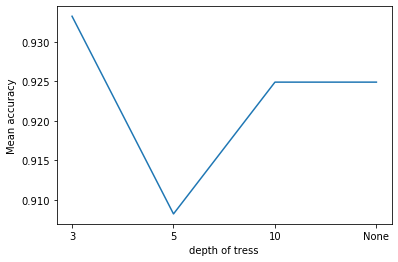

In [8]:
#Q4 final Decision Trees 
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
iris = sns.load_dataset("iris")  
X = iris.iloc[:, :-1].values                                                    # all x values are the features 
y = iris.iloc[:, 4].values                                                      # all y values are the class label 


max_d=[3,5,10,None]
list=[]
list2=[]
for mx in max_d:
    x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)   ##splitting the data into test data(80%) train data(20%)
    clf = DecisionTreeClassifier(max_depth=mx,random_state=42)  #creates an instance of Decision tree
    clf.fit(x_train,y_train)
    scores = cross_val_score(estimator=clf, X=x_train, y=y_train, cv=10,scoring='accuracy') #using 10 fold cross validation which will use 90 percent of data for␣training and 10 percent of data for validating
    list.append(scores.mean())  #stores the mean accuracy score
    


#plotting the graph
m=['3','5','10','None']
plt.plot(m,list)
plt.ylabel('Mean accuracy')
plt.xlabel('depth of tress')

The best accuracy is at depth 3 since it has the highest accuracy, 93.32%

In [9]:
from sklearn import metrics
# testing the mean accuracy score of the test data on the tree classifier
clf = DecisionTreeClassifier(max_depth=3,random_state=42)  #creates an instance of Decision tree
clf.fit(x_train,y_train)
   
metrics.accuracy_score(y_test,clf.predict(x_test)).mean()*100

100.0

The accuracy is 100%

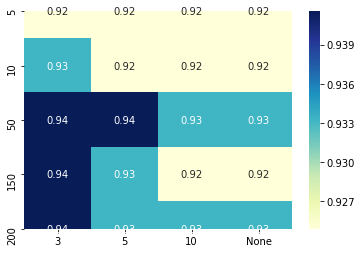

In [10]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
num_trees = [5,10,50,150,200]
max_d=[3,5,10,None]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)   ##splitting the data into test data(80%) train data(20%)
cm_df=np.ndarray(shape=(len(num_trees),len(max_d))) #creating a 5X4 matrix to store data 
#acc=[]
for n in range (len(num_trees)):
    for m in range (len(max_d)):
        clf_RF = RandomForestClassifier(n_estimators=num_trees[n],max_depth=max_d[m],random_state=42)   #creating an instance of a random tree
        results =cross_val_score(clf_RF, X=X_train, y=y_train, cv=10,scoring='accuracy')     #using 10 fold cross validation which will use 90 percent of data for␣training and 10 percent of data for validating
        #print('for num_trees:',num_trees[n],' and depth: ',max_d[m],"----> ",results.mean())
        cm_df[n][m]=results.mean()      #storing the accuracy
#        print(results.mean())

m=['3','5','10','None']
data = pd.DataFrame(data = cm_df, index = num_trees, columns = m)

#print(cm_df[n][m])
#ploting the graph
sns.heatmap(data,annot=True,cmap="YlGnBu")
plt.imshow(data)

The highest accuracy is 94.25% which is obtained when
1)no of trees is 50 and depth can be 3 or 5,
2)no of trees is 150 and depth is 3
3)no of trees is 200 and depth is 3 Since all give the same highest accuracy we can choose no of trees=200 and depth as 3 since 3 n_estimators is the number of trees you want to build before taking the maximum voting or averages of predictions. Higher number of trees can slow down the training process considerably and after a certain number of trees, the improvement is negligible max_depth represents the depth of each tree in the forest. The less deeper the tree, typically would make the ensemble converge a little earlier. Also, more number of trees increases the probablility of overfitting while more depth increases variance

In [ ]:
from sklearn import metrics
# testing the mean accuracy score of the test data on the tree classifier
clf = RandomForestClassifier(n_estimators=200,max_depth=3,random_state=42)#creates an instance of Decision tree
clf.fit(x_train,y_train)
metrics.accuracy_score(y_test,clf.predict(x_test)).mean()*100

The accuracy is 100%

[93.25757575757574, 93.25757575757574, 92.48834498834498, 91.65501165501165, 91.65501165501165]


Text(0.5, 0, 'number of estimators')

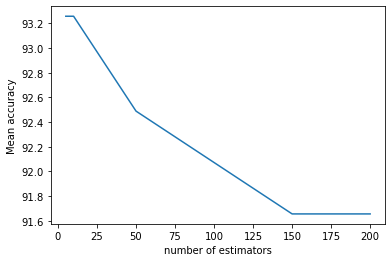

In [11]:
#Q4 Gradient Tree Boosting

from sklearn.ensemble import GradientBoostingClassifier
estimators=[5,10,50,150,200]
accuracy=[]
scores=0
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)  ##splitting the data into test data(80%) train data(20%)

for e in estimators:
    scores=0
    clf = GradientBoostingClassifier(n_estimators=e, random_state=42)        #calling the instance of Gradient Boosting classifier
    clf.fit(X_train,y_train)
    scores = cross_val_score(clf, X_train, y_train, cv=10,scoring='accuracy')  #using 10 fold cross validation which will use 90 percent of data for␣training and 10 percent of data for validating
    accuracy.append(scores.mean()*100)                                        #storing the mean accuracy
print(accuracy)
#plotting the graph
plt.plot(estimators,accuracy)
plt.ylabel('Mean accuracy')
plt.xlabel('number of estimators')

The highest accuracy is at 93.25% where n_estimators is 5 and 10. The highest accuracy is at 93.25% where n_estimators is 5 and 10,  We select 5 as n_estimators The number of boosting stages to perform. Gradient boosting is fairly robust to over-fitting trees but it can still overfit at a point. Also at 5 the system works slighly faster

In [ ]:
from sklearn import metrics
# testing the mean accuracy score of the test data on the tree classifier
clf = GradientBoostingClassifier(n_estimators=10,random_state=42) #creates an instance of Decision tree
clf.fit(x_train,y_train)
metrics.accuracy_score(y_test,clf.predict(x_test)).mean()*100

Accuarcy obtained is 100%